# Galaxy Populations and Visualization

**This activity explores ways of interfacing with the SDSS database, retrieving and visualizing data about the population of galaxies in the Universe. This notebook is intended to be run in the SciServer Compute platform.**  

This tutorial developed by Karen Masters for ASTR352 at Haverford College, borrows heavilly from [Week 3: Data Querying and Visualization](https://github.com/brittlundgren/SDSS-EPO/tree/master/SciServer_notebooks), part of a series of SciServer based Astronomy notebook tutorials by Britt Lundgren. 

As with all Jupyter Notebook tutorials, the procedure you should follow is to run each cell for yourself. You will see places below where you are asked to experiment with adding code, or copying lines of code and changing numbers (and excellent example of coding in practice). 

**ASTR352 Students:** 
* Please work in pairs. 
* Read the instructions aloud and discuss each step. 
* **Don't miss the instructions types as comments in the code boxes**
* Make sure you can both run the code in your Sciserver account (or elsewhere). 
* **It is clearly marked what you need to answer. Please each individually copy these plots/comments/answers into a separate document to turn into a PDF to submit.** 
* [Template turn in document](https://docs.google.com/document/d/1Z41CYRaK08Kj8Trt7enqummYnIId6pXI_DRzyED4zzU/edit?usp=sharing)

# Introduction to the SciServer 
SciServer.org provides a means of interacting with astronomical imaging and spectroscopy data from the [Sloan Digital Sky Survey](http://sdss.org).  

The following python notebook gives an example of how you can use [SciServer Compute](http://www.sciserver.org/tools/compute/) for your own astronomy research from anywhere with access to the internet. Because of SciServer's unique capabilities, you can access and analyze the vast SDSS dataset in the cloud without downloading anything (including code!) to your local computer.   All you need in order to get started is a web browser! 

For this course we will be using the programming language Python 3 to interface with the SciServer, although you can also write scripts using R. A complete tutorial to Python 3 can be accessed [here](https://docs.python.org/3/tutorial/).  A shorter tutorial with some basics is provided below.

## Getting Started with SciServer

1. The first thing you need to do is to set up an account with [SciServer Compute](http://compute.sciserver.org/). See [these instructions](https://docs.google.com/document/d/1ZNRgYDjiLZo0d-nXQhYsDVS8DadK_s1SRWXjPTEH0gg/edit?usp=sharing) for help.

2. Once you are logged in to your account, create a container for your SciServer work. Make sure to use the "Astronomy Image" and "attach" the SDSS data volumes.

3. Within that container, you can create a new Python 3 notebook, which allows you to write and run your code online. You may find it easier to simply work within this notebook by modifying the cells below.  There are blank cells following prompts labeled "Experiment", where you can add your own code.

4. Try writing a few lines of code and click the "play" button (alternatively, "Shift+Return") to run your code:


## I. Visualizing Data

**The standard Python library for plotting and visualization is called _Matplotlib_$^{1}$.  Below are a few examples showing what it can do.**  

An excellent tutorial can also be found here: https://www.labri.fr/perso/nrougier/teaching/matplotlib/

$^{1}$J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.


In [ ]:
# import matplotlib and some of its modules, and tell Notebook to plot inline. 

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('OK')

If you don't receive any errors after running the blocks of code above, you can try playing around with the libraries.  Shown below are a few examples of figures that can be made using Matplotlib. Please run the code to convince yourself it works, and discuss with your coding partner what it is doing. 

Simple demo of a Scatter plot: 

In [ ]:
"""
Simple demo of a scatter plot.
http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
"""
import numpy as np

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x,y, s = 50,c='cyan', label = 'data')
plt.legend()
plt.show()

In [ ]:
"""
Slightly more complex demo of a scatter plot.
http://matplotlib.org/examples/lines_bars_and_markers/scatter_with_legend.html
"""

import matplotlib.pyplot as plt
from numpy.random import rand


fig, ax = plt.subplots()
for color in ['red', 'green']:
    n = 75
    x, y, z = rand(3,n)
    scale = 200.0 * rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

Matplot lib contains examples of many common plot styles. My advice for any plotting task, is to never start by writing your own plot code, always see if there's an example you can modify. For example histograms are used a lot in astronomy, and are easy to make: 

In [ ]:
"""
Simple demo of a histogram.
http://matplotlib.org/examples/frontpage/plot_histogram.html
"""

# Let's make a random normal (Gaussian) distribution, centered on 0, with a standard deviation of 1
mu = 0
sigma = 1
samplesize = 1000
s = np.random.normal(mu,sigma, samplesize)

print ("Sample size: {:.0f}".format(samplesize))
print ("Mean: {:.2f}".format(np.mean(s)))
print ("Median: {:.2f}".format(np.median(s)))

plt.hist(s, bins=10, color='blue', alpha=0.5)
plt.show()

## Your Turn

**1. Change the colour of the histogram, and something about the scatter plot with two types of points (e.g. colour or shape of one of the points) and put into your turn-in document.**

This [thumbnail gallery](http://matplotlib.org/1.2.1/gallery.html) is useful for finding example code for making just about any kind of plot or visualization you can think of. If you're a fan of [XKCD](http://xkcd.com/), you can also XKCD-ify your plots with the code found [here](http://matplotlib.org/xkcd/gallery.html) :)

Pick a plot style you like (other than a simple scatter plot or histogram) from Matplotlib [thumbnail gallery](http://matplotlib.org/1.2.1/gallery.html) and include it in this notebook. 

Extension activity (for those finding this easy - no judgement will be applied either way): make it a plot style you can find an example of in an astronomical paper.... and also show the example from the paper. 

**2. Please copy the plot you choose to make into what you turn in, and explain why you picked it (no wrong answers)**

In [ ]:
# Put your code here

## II. Importing SciServer and other important libraries
The SciServer team has written a number of libraries, generally prefixed with "SciServer", that assist in various functions. As with all Python libraries, they must be actively imported before being used, even when running a Notebook in the Sciserver environment.

The next code block imports those, together with some standard Python libraries helpful for scientific analysis. The code block below applies some settings you may find helpful.

In [ ]:
# Import Python libraries to work with SciServer (see http://www.sciserver.org/docs/sciscript-python/)

import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SkyServer as SkyServer # show individual objects through SkyServer
import SciServer.SciDrive           # read/write to/from SciDrive, cloud-based storage for your work
import numpy as np                  # standard Python library for math operations
import pandas                       # package for structuring and visualizing data
import matplotlib.pyplot as plt     # package for graphing and visualization 
print('SciServer libraries imported')

In [ ]:
# Apply some special settings to the imported libraries

# ensures columns get written completely in notebook
pandas.set_option('display.max_colwidth', None)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

## III. Querying the Sloan Digital Sky Survey's database (SDSS DR17)
The next code block searches the SDSS Data Release 17 database via the CasJobs API. 

Resources which may help if you run into trouble (or for further reading): 
* Documentation on the SciServer Python libraries can be found on the SciServer Python documentation site at:
http://www.sciserver.org/docs/sciscript-python/
* An extensive tutorial on how to query the SDSS database can be found here:
http://cas.sdss.org/dr16/en/help/howto/search/searchhowtohome.aspx
* The paper describing the SDSS Data Release 17 (which I co-ordinated the writing of as SDSS-IV Spokesperson) is available at the following link: https://ui.adsabs.harvard.edu/abs/2022ApJS..259...35A/abstract
* There is also a lot of documentation on which Tables, Columns and "Views" of Tables are available here: http://cas.sdss.org/dr17/en/help/browser/browser.aspx

**Run the code block below** to query DR17 to get a random 16 "nice looking galaxies" (big in angular scale and bright). 

FYI, this query makes use of the "Galaxy" view of "PhotoPrimary" table, which is objects from "Photoprimary" which have been classified as galaxies (instead of e.g. stars). 

In [ ]:
# Find objects in the Sloan Digital Sky Survey's Data Release 17.
#
# Query the Sloan Digital Sky Serveys' Data Release 17.
# For the database schema and documentation see http://skyserver.sdss.org/dr17
#
# This query finds "a 4x4 grid of nice-looking galaxies": 
#   galaxies in the SDSS database that have a spectrum 
#   and have a size (petror90_r) larger than 10 arcsec.
# 
# First, store the query in an object called "query"
query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r, p.g, p.r
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17  AND p.petror90_r > 10
"""
gals = CasJobs.executeQuery(query, "dr17")
gals = gals.set_index('objId')
gals

**3. Question for you to answer:** What are the units of ```Petro_r90```? What are ```u``` and ```g```? Give some example sof different magnitudes SDSS has available.

(HINT: To answer this look at the columns available in the "Galaxy" view of the "PhotoPrimary" Table - see the right side drop down menus at http://cas.sdss.org/dr17/en/help/browser/browser.aspx for "Galaxy" under "Views" or "PhotoPrimary" under "Tables")

#### EXPERIMENT:  What happens if you change the query?

Try changing the query in the following ways: 
- Return 8 matching objects instead of 16.
- Add a column which returns redshift: ```s.z```

Now try these different subsets: 
- Select only nearby galaxies (redshift < 0.05).
- Select only galaxies likely to be starforming (with u-r color < 2.22)
- Search for galaxies likely to be old (g-r>=0.6). 

Try it in the code block below. 

**4. Make a screen grab of one of these subsets to put into what you turn in.**

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

In [ ]:
# your code here

## III: Tables, Panda and Data Frames

The SciServer query returns something called ```gals``` which is an example of a data frame - specifically this is a table of data with a set of rows and columns (strictly speaking you can change the format which is returned, but something called a "panda dataframe" is the default).

The Sciserver modules make use of [Pandas](https://pandas.pydata.org/) to organizes these data. 

The cells below provide a quick intro to Panda... you can find more on their website. Even if you already use it, you can always learn something new.  

In [ ]:
#import Pandas (for good coding, you would usually put this at the top of your Notebook)
import pandas as pd
print('Pandas is imported')

In [ ]:
#Show the top rows
gals.head()

In [ ]:
#For a useful set of summary statistics of what's in each column: 
gals.describe()

In [ ]:
#Select a single column (e.g. to make a plot, or do math)
ra=gals['ra']
print(ra)

In [ ]:
#Sometimes that's not enough - if you want to turn a column into a list of number (usually for reasons of math)
ra = gals['ra'].values
print(ra)

In [ ]:
#Select a subset of data based on column values  (aka Boolean indexing or "slicing") 
# - seriously my group does this ALL THE TIME!
# np.where() is a similar process.
neargals=gals[gals['petror90_r']>15]
neargals.head()

**5. Question why would I call this selection on ['petror90_r']>15 "neargals"?**
Don't worry about wrong answers - just think about it and put something in your turn in document. 

In [ ]:
#Add a column based on some math, for example a classic colour in extragalactic circles is g-r, so...
grcolour=gals['g']-gals['r']
gals['grcolour']=grcolour
gals.head()

## Your turn

Visit the [Pandas](http://pandas-docs.github.io/pandas-docs-travis/) website to find another interesting/useful thing you can do with a pandas data frame and demonstrate it below. 

**6. Turn in the code and output**

In [ ]:
# Run your code here. 

#FOR EXAMPLE SORTING looks quite useful - but you do something different! 
gals.sort_values(by='grcolour')


## IV. A Fair Sample of the Universe
Now that we know how to run queries, and manipulate the tables they return lets consider what it means to have a fair sample of galaxies in the Universe. 

**7. Question for you: What do you think a fair sample of galaxies means?**

Now we will make a simple plot of redshift (x-axis) against g-band Absolute magnitude (Mr, y-axis), for a sample of a 1000 galaxies selected using the query below. 

Recall absolute mag, $M = C + 2.5 \log (L/L_\odot)$ is a logarithmic version of luminosity - it's a physical property of the galaxy, as opposed to the apparant magnitude, $m$ which is a logarithmic version of the observed flux (apparant magnitude depends on our point of view). 

In [ ]:
#Select 1000 random galaxies

query="""
SELECT TOP 1000 p.objId,p.ra,p.dec,p.petror90_r, p.g, p.r, s.z
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
"""
gals = CasJobs.executeQuery(query, "dr17")
gals = gals.set_index('objId')
gals

Remind yourself (think back to ASTR204) how to get absolute magnitudes, from the apparent magnitudes ($m_r  = $ ```p.r```) which are in this table? 

The equation you need is, 

$m - M = 5 \log d - 5$, 

where $d$ is in pc, $m$ is the apparent magnitude, and $M$ is the absolute magnitude. 

**8. Explain the difference between absolute magnitudes and apparent magnitudes. Explain why the concept of a ''distance modulus'' can be useful for coding (and what it is).**

## Aside: Astropy Cosmology Modules

So you should have noticed above you need a distance, and we only have redshifts for these galaxies. [Astropy](http://www.astropy.org) to the rescue (which so often works for python in astronomy!). This is already installed in Sciserver so we can import the astropy units and cosmology modules, and it will do all the hard work for us to work out a distance modulus from this redshift.

Unfortunately [Astropy and Pandas aren't always compatible...](https://docs.astropy.org/en/latest/known_issues.html#multiplying-a-pandas-series-with-an-unit-does-not-produce-a-quantity) fun times. Don't ask how long it took me to work that out. 

Anyway we wil first convert our Pandas data frame to an [Astropy Table](https://docs.astropy.org/en/stable/table/index.html) which is a different way to store table data in python. Honestly you can run most of the same commands with pandas data frame or a table BUT the cosmology modules in astropy complain, so...

In [ ]:
from astropy.table import Table
tgals = Table.from_pandas(gals) 
tgals

In [ ]:
from astropy import units as u
from astropy.coordinates import Distance

redshift=tgals['z'].quantity #Extracts the quantity object from the table (this is what Distance() wants)
d = Distance(z=redshift,allow_negative=True)
tgals['distmod']=d.distmod
tgals

#THIS DOES THE SAME AS WHAT ASTROPY DOES (ALTHOUGH COSMOLOGY CHOICES MAY DIFFER)
#If you have trouble with the astropy distances try this instead. 
#H0=70 #H0 in km/s/Mpc
#c=3e5 #Speed of light in km/s
#d = c*gals['z']/H0 # Gives d in Mpc, assuming linear expansion (OK nearby)
#d = 1e6*d #D in pc needed for distance modulus
#distmod = 5.*np.log10(d) -5.0
#gals['distmod']=distmod


In [ ]:
#Code the equation to calculate absolute magnitudes using the distance modulus here
# your code here

In [ ]:
#Put your code for the scatter plot of redshift and absolute magnitude here. 
#Don't forget axis labels, and that brighter magnitudes are smaller numbers (reverse the y-axis)

# your code here

**9. Put your plot into your turn-in document and describe what you see in the plot.** 

TO PLAY ALONG - DO THIS BEFORE READING ON. 

Meanwhile I'll show you how to show an image here. This is Stephan's Quintet imaged by HST. It's pretty easy to put images into Markdown boxes it turns out (yes this is words to fill in space). 

Double click on the markdown box if you want to see what I typed to make this work.  

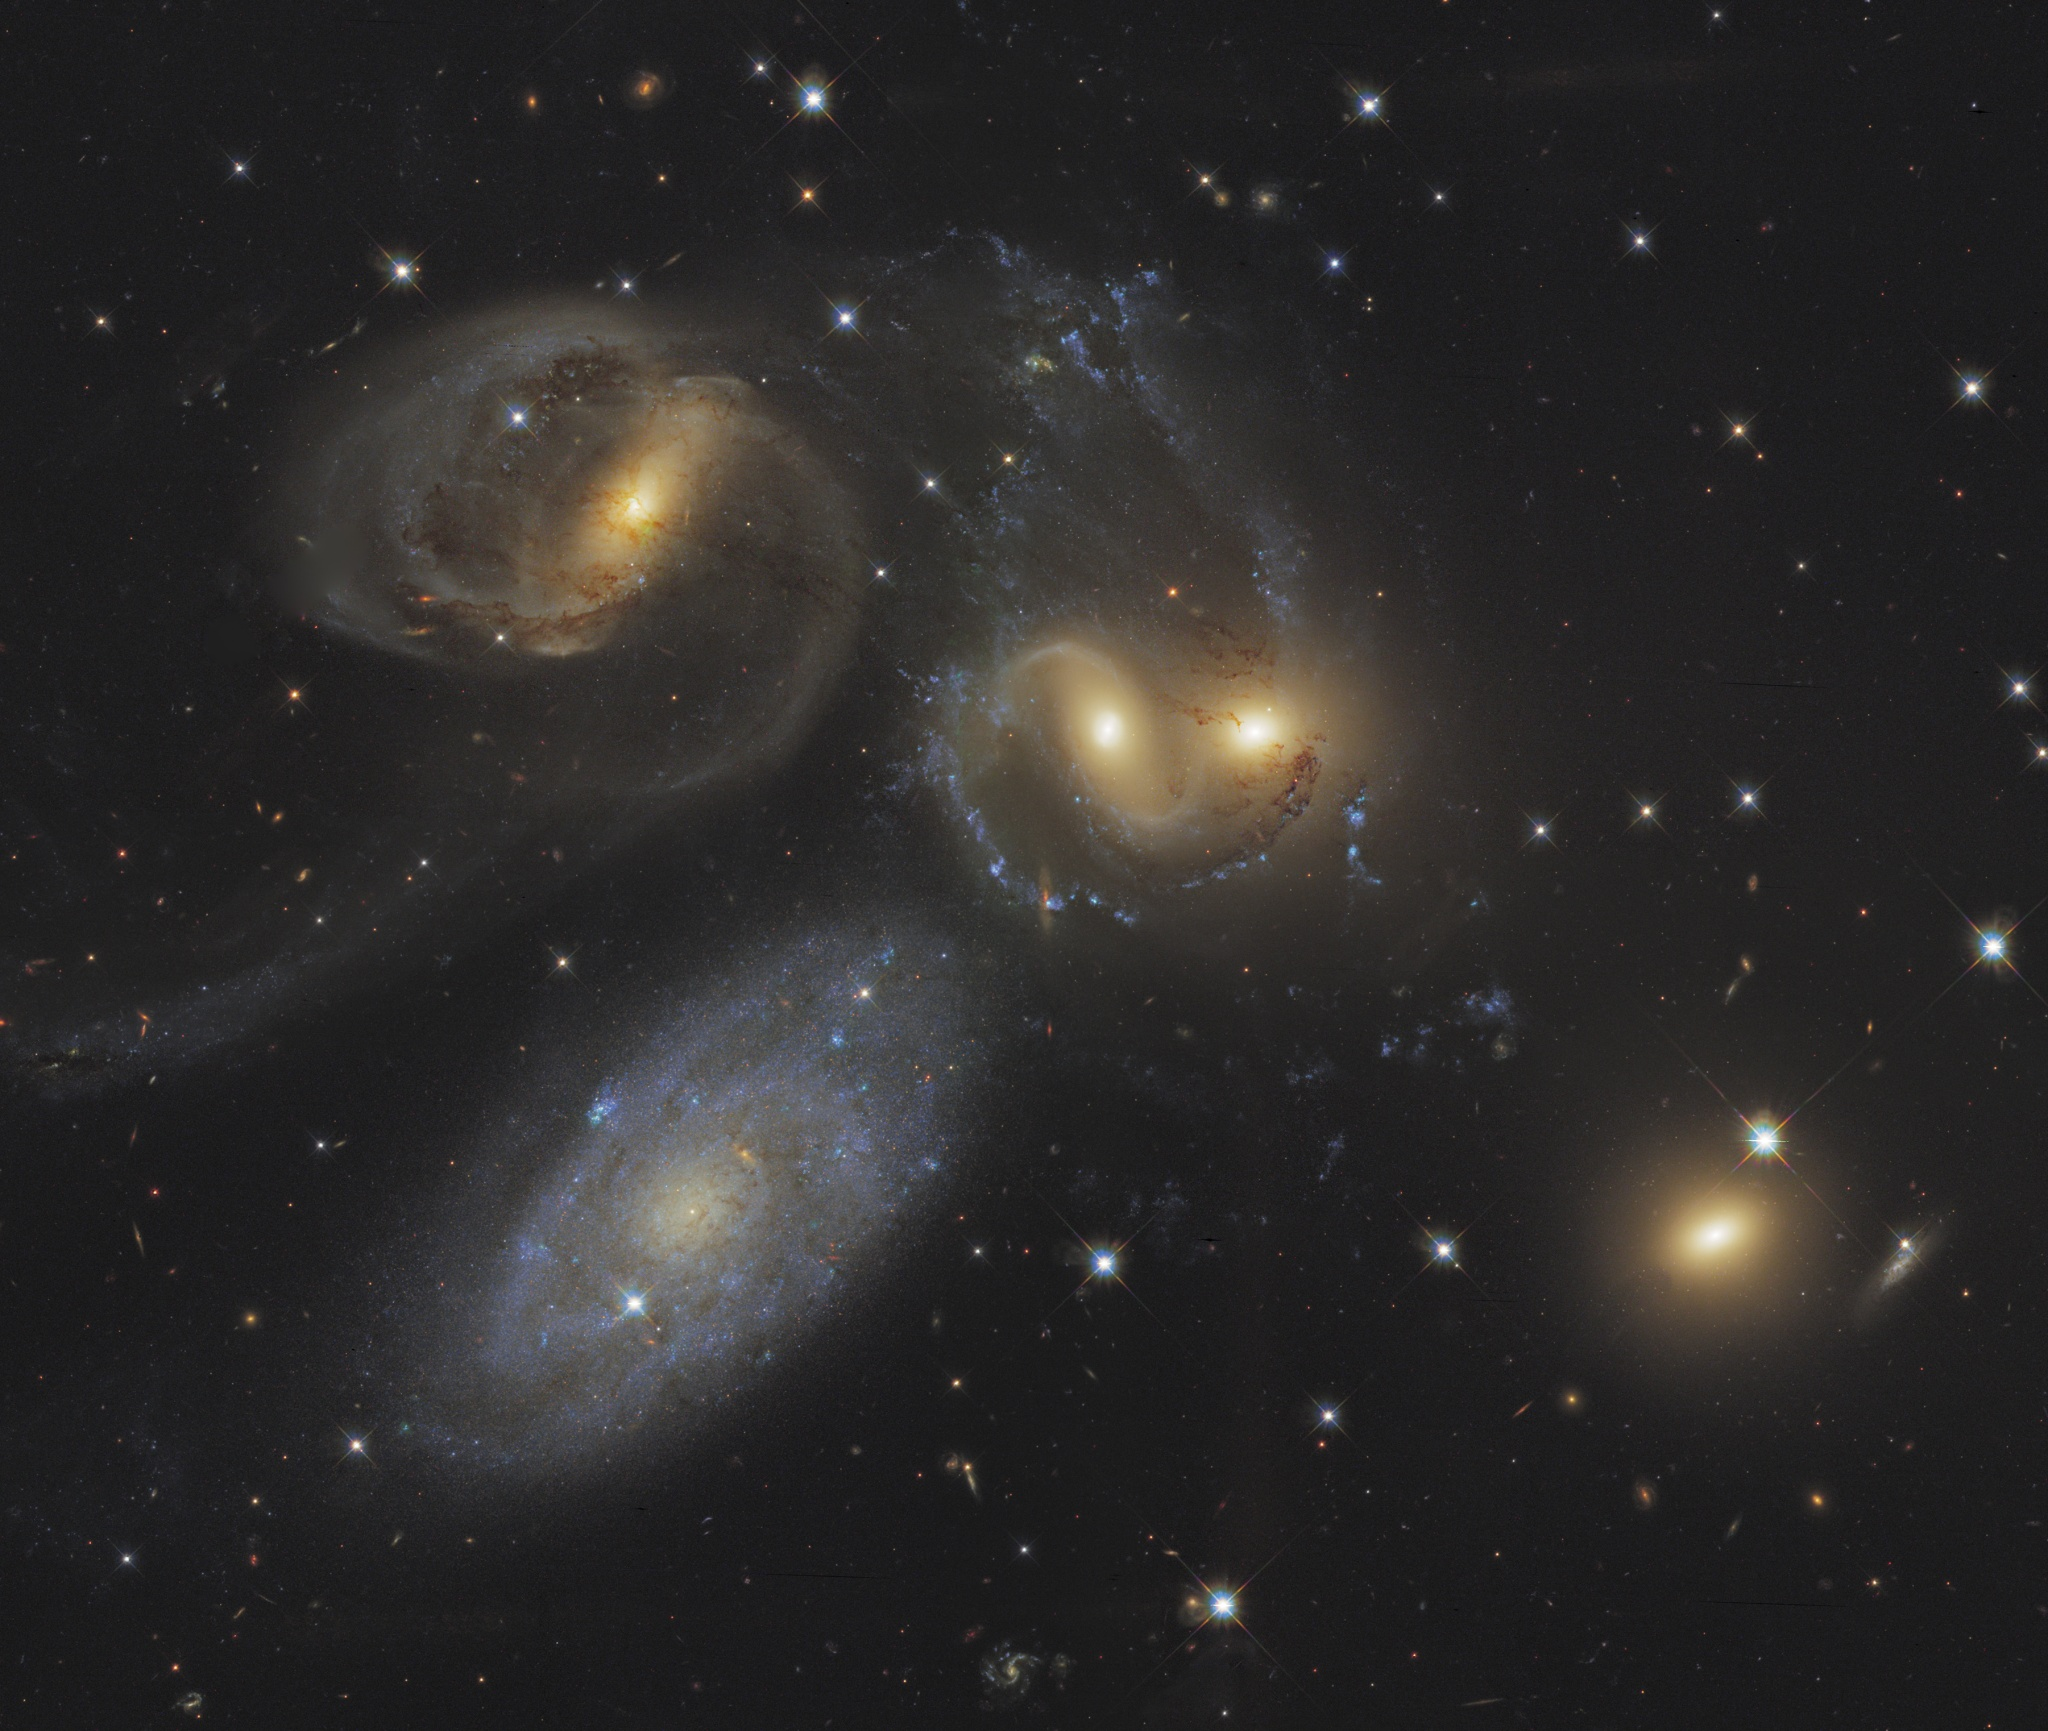

### Magnitude and Redshift limits for a volume limited sample

OK now we've taken up some space, let's discuss the features in that plot. 
* You might notice some really odd dim magnitudes for z<0.01 or so - this is because you can't use Hubble's Law for the nearest galaxies to get distances, so we should filter those out. 
* Large range in redshift: it'll turn out that for z>0.08 or so, the galaxies get really small in angular scale (some people call this "blobbology" because they all look like "blobs"), and I want you to be able see what your galaxies look like, so we'll get rid of anything z>0.08
* Maximum brightness, at about $M_r\simeq-23$ mags - this is real - there is a maximum size for a galaxy you will see in a finite volume of the Universe (bigger the volume the larger this is... although eventually there just is a maximum size for a single galaxy). 
* Hook shape - looks like some kind of minimum brightness of galaxy in the data which scales with distances... this is an observational effect - we can see brighter galaxies at larger distances. So for a fair sample (see all galaxies at all distances) we should put in a limit on magnitude too. 

Now you might be worrying that if we put all these limits in we'll run out of galaxies, but there are over 1 million galaxies in the SDSS database. We can easilly find 1000 with these properties. 

### Limiting Magnitude

First we have to figure out the correct limiting magnitude. You can find our (or if you are me remember) that for SDSS $r<17.77$ is the observational limit for galaxies. We'll further limit this to $r<17$ to have a sample of bright, well detected galaxies (this is what [Galaxy Zoo 2](https://ui.adsabs.harvard.edu/abs/2013MNRAS.435.2835W/abstract) did - which may also be useful!).

Then we can use Astropy to help us figure out the absolute magnitude of a galaxy with this apparent magnitude at the edge of our volumne ($z=0.08$). Anything brighter than this can be seen throughout the volume, anything dimmer will only be seen in the nearside, and could bias the sample.  

In [ ]:
#Code to work out absolute magnitude of a galaxy at z=0.08 with an apparent magnitude m=17.
zlim=0.08
DM = Distance(z=zlim).distmod
M = 17-DM.value
print('The limiting magnitude for SDSS to z=', zlim , ' is ', M)

In [ ]:
# In this cell copy and then edit a query from above and make a new gals table containing a few thousand galaxies 
# which is just selected from 0.01 < z < 0.08. and r< 17. 
# To apply the Mr<-20.79 filter we'll have to do some post query filtering, hence select >1000 here. 

# your code here

#Put this at the end to make your table an Astropy table. 
gals = Table.from_pandas(gals) #Notice poor coding behaviour here, overwriting the table.  
gals

In [ ]:
#Put some code here which adds an Mr column and does a filter for Mr<-20.87 (or the value calculated above)

# your code here

# your code here - call your new table "fairgals" for "fair sample of galaxies". 
fairgals=gals[SELECTION NEEDED]
fairgals


**10. Put the plot you make below into your turn-in document. Why are there fewer bright galaxies at the lower redshifts? What galaxies are removed in your "fairgals" sample?** 

In [ ]:
# Make a redshift-MR plot here to check the sample. Plot both the entire query sample (gals)
# and the sample with M_r<-20.79 (fairgals).
# You will need to use different colour points. And plot gals first. 
# You should see a roughly rectangular distribution in gals
# from 0.01<z<0.08 and -20.79> M_r > -23.5 ish. 
# Why are there fewer bright galaxies at the lower redshifts?
# What galaxies are removed? 

## V. A Famous Plot in Extragalactic Science

You are already familiar with the use of colour-magnitude plots in stars, and we already probably saw some in our reading for galaxies. Let's make a $(g-r)$ vs. $M_r$ plot for our sample of galaxies. We'll actually keep both the entire sample, and the subset which we know we can see across the entire volume, as it'll make for some interesting plots. 

In [ ]:
# Code to add a colour column
fairgals['grcolour']=fairgals['g']-fairgals['r']
gals['grcolour']=gals['g']-gals['r']

#Code for plot
plt.scatter(gals['Mr'], gals['grcolour'])
plt.scatter(fairgals['Mr'], fairgals['grcolour'],c='green')
plt.ylim(0.1,1.25)
plt.xlim(-16.5,-23)
plt.ylabel('(g-r) colour')
plt.xlabel('Absolute magnitude, r-band')
plt.show() 


Both this plot, and the earlier one looking at the magnitude redshift distribution are starting to reveal the limitations of the scatter plot as a data visualisation when there are a lot of points. A scatter plot with a lot of overlapping data points can be challenging to understand. 

The "alpha" parameter in the "scatter" function allows you to modify the transparency of markers on the plot. You may want to try changing this value within the range 0-1 to see the difference it makes.  

In [ ]:
#Code for plot using alpha
plt.scatter(gals['Mr'], gals['grcolour'],alpha=0.1)
plt.scatter(fairgals['Mr'], fairgals['grcolour'],c='green',alpha=0.1)
plt.ylim(0.1,1.25)
plt.xlim(-16.5,-23)
plt.ylabel('(g-r) colour')
plt.xlabel('Absolute magnitude, r-band')
plt.show() 

If even a very low value for the "alpha" parameter does not clarify densely clustered points, a color-coded density plot (shown below) is just one of various outher ways you can make a crowded plot more understandable.

In [ ]:
#Code for a colour code density plot. 

# Bit of cleaning to help the histogram (try doing it without this step if you like!)
plotgals=gals[(gals['Mr']>-23) & (gals['Mr']<-16) & (gals['grcolour']>0.1) & (gals['grcolour']<1.25)]

mr = plotgals['Mr']
colour=plotgals['grcolour']

nbins=50
plt.hist2d(mr,colour,bins=nbins)
plt.ylabel('g-r')
plt.xlabel('M_r')
plt.ylim(0.15,1.2)
plt.xlim(-16.5,-23)
plt.colorbar()
plt.show()

**11. Now make some other version of this plot (e.g. with contours, or other point styles). Anything you like is fine.**

**Extension activity:** One technique for making nicer plots, is to use other people's code to do it! Astronomers in general have a wonderful open code philosophy, so you can find tons of code on [Github](www.github.com). 

For example, my collaborator Ross Hart put all the code he used to make figures for a paper we worked on together [Masters et al. 2019]() in this [Github Notebook](https://github.com/RossHart/Hubble_sequence/blob/master/gz2_vs_data.ipynb). 

Or my collaborator [Coleman Krawcyzk](https://github.com/CKrawczyk) also puts up loads of code. For example here's his [Density plot](https://github.com/CKrawczyk/densityplot) code. 

To run other people's code you need to first have it in the Folder you have this notebook. Watch out for dependencies too.  

In [ ]:
#Your code here for a plot. 

## VI. Storing results for later use
The next code block saves the data table "gals" as an HD5 file and as a comma-separated values (CSV) file.

To see these files, go back to your iPython notebook dashboard (the page from which you opened this notebook). Make sure you are in the persistent folder. You should see your files there. Click on the file names to preview. You can't look at a .FITS file in previous - only the .dat and .tex ones. 


In [ ]:
from astropy.io import ascii
from astropy.io import fits

#ASCII file output
gals.write('gals.dat', format='ascii', overwrite=True)

# Latex table! This is amazing for making tables for your papers... 
gals.write('gals.tex', format='latex', overwrite=True)

# store result as FITS file 
gals.write('gals.fits', format='fits', overwrite=True)

print ("Done.")

## VII. Retrieve thumbnail cutouts of galaxies and show them on screen
SkyServer has a super useful service that will produce a color image cutout of certain dimensions around a specified position, displayed as a JPG thumbnail.

The code below iterates through each galaxy in a list and calls the image cutout generator for each galaxy. The scale of the image depends on the Petrosian radius of the galaxy.

We don't want to do this with 1000 galaxies, so lets first pick out 16 big (angular scale) galaxies. 

In [ ]:
# Find the code from above which does that and put it here. 

query="""
SELECT TOP 16 p.objId,p.ra,p.dec,p.petror90_r, p.g, p.r
  FROM galaxy AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE p.u BETWEEN 0 AND 19.6
  AND p.g BETWEEN 0 AND 17  AND p.petror90_r > 10
"""
gals = CasJobs.executeQuery(query, "dr17")
gals = gals.set_index('objId')
gals

In [ ]:
#Now run this code to get the images. 

# set thumbnail parameters
width=200           # image width
height=200          # height
pixelsize=0.396     # image scale
plt.figure(figsize=(15, 15))   # display in a 4x4 grid
subPlotNum = 1

i = 0
nGalaxies = len(gals)
for index,gal in gals.iterrows():           # iterate through rows in the DataFrame
    i = i + 1
    if i<17:
        print('Getting image '+str(i)+' of '+str(nGalaxies)+'...')
        if (i == nGalaxies):
            print('Plotting images...')
        scale=2*gal['petror90_r']/pixelsize/width
        img= SciServer.SkyServer.getJpegImgCutout(ra=gal['ra'], dec=gal['dec'], width=width, height=height, scale=scale,dataRelease='DR13')
        plt.subplot(4,4,subPlotNum)
        subPlotNum += 1
        plt.imshow(img)                               # show images in grid
        plt.title(index)                              # show the object identifier (objId) above the image.

This should demonstrate the two main types of galaxy morphology in the Universe. You probably heard about this in ASTR204, but if you need a refresher read over [Types of Galaxies](https://openstax.org/books/astronomy/pages/26-2-types-of-galaxies) in OpenStax Astronomy. 

**12. Include your 16x16 set of galaxies and describe in your own words how these demonstrate different types of galaxy morphology**

## Activities

Please pick at least one of these activites to do in the cells below. In all cases turn in any plots you make and make sure to write some words reflecting on what you found. If you are not sure discuss with KLM. 

1. Generate samples of red and blue galaxies (use the plots we made above of colour and magnitude to figure out a sensible colour cut to use), and inspect the images of a reasonable number of them (e.g. 16 is fine, more if you like). Can you make any general statements about the correlation between colour and morphology in galaxies.

2. Similar to (1) but try to use the Galaxy Zoo morphologies (e.g. the table called ["zoo2photoz"](http://cas.sdss.org/dr16/en/help/browser/browser.aspx#&&history=description+zoo2MainSpecz+U)). Make a colour-magnitude diagram of just spirals and just ellipticals. Make some images of red spirals and/or blue ellipticals.

3. Make a plot of your choice of physical galaxy properties (anything you can find in any of the SDSS tables is fine - e.g. masses, star formation rates, colours, luminosities, anything else which can be measured from spectra or photometry of a galaxy). You may like to discuss ideas with KLM to seek interesting choices, or what might be available. 

4. Make a plot of the fraction of spiral galaxies that have bars as a function of colour (hint: histograms will be useful here, and think about pre-selection). E.g. this is like the top panel of Figure 3 from [Masters et al. 2011](https://ui.adsabs.harvard.edu/abs/2011MNRAS.411.2026M/abstract) (only probably prettier, as those plots were made before KLM knew any python). If you'd done that 10 years ago you could have published it.... 